# Customer Churn Prediction - Case Study:

## 1: Introduction: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.grid'] = False

## 2: Data Exploration:

In [ ]:
table = pd.read_csv('Churn_Modelling.csv')
data = table.copy()
print(f'Dimension of the Data: {data.shape}')
for column in data.columns:
    print(f'Column: {column:20} | \
    Type: {str(data[column].dtype):10} | \
    Missing Values: {data[column].isnull().sum()}')

Dimension of the Data: (10000, 14)
Column: RowNumber            |     Type: int64      |     Missing Values: 0
Column: CustomerId           |     Type: int64      |     Missing Values: 0
Column: Surname              |     Type: object     |     Missing Values: 0
Column: CreditScore          |     Type: int64      |     Missing Values: 0
Column: Geography            |     Type: object     |     Missing Values: 0
Column: Gender               |     Type: object     |     Missing Values: 0
Column: Age                  |     Type: int64      |     Missing Values: 0
Column: Tenure               |     Type: int64      |     Missing Values: 0
Column: Balance              |     Type: float64    |     Missing Values: 0
Column: NumOfProducts        |     Type: int64      |     Missing Values: 0
Column: HasCrCard            |     Type: int64      |     Missing Values: 0
Column: IsActiveMember       |     Type: int64      |     Missing Values: 0
Column: EstimatedSalary      |     Type: float64    |

In [ ]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cols = set(data.columns) - {'RowNumber','CustomerId'}
(data[list(cols)]).describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09


Interpretting the Table: 

* The age of customers ranges from 18 to 92, with a mean value approximately equal to 40,
* The mean (and median) tenure is 5 years, so the majority of customers is loyal (tenure > 3), and
* Approximately 50% of customers are active.

In [ ]:
data.rename(columns=
        {'RowNumber':'Row_Number',
         'CustomerId':'Customer_ID',
         'CreditScore':'Credit_Score',
         'HasCrCard':'Has_Credit_Card',
         'IsActiveMember':'Is_Active_Member',
         'NumOfProducts':'Num_Of_Products',
         'EstimatedSalary':'Estimated_Salary'}, inplace=True)

In [ ]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products',
       'has_credit_card', 'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [ ]:
exited_encoded = {0:'Retained',1:'Churned'}
data['exited'] = data['exited']\
    .apply(lambda x: exited_encoded[x])
data['exited'].value_counts()

Retained    7963
Churned     2037
Name: exited, dtype: int64

In [ ]:
member_encoded = {0:'No',1:'Yes'}
data['is_active_member'] = data['is_active_member']\
.apply(lambda x: member_encoded[x])
data['is_active_member'].value_counts()

Yes    5151
No     4849
Name: is_active_member, dtype: int64

In [ ]:
card_encoded = {0:'No',1:'Yes'}
data['has_credit_card'] = data['has_credit_card'].apply(lambda x: card_encoded[x])
data['has_credit_card'].value_counts()

Yes    7055
No     2945
Name: has_credit_card, dtype: int64

## 3: Exploratory Data Analysis:

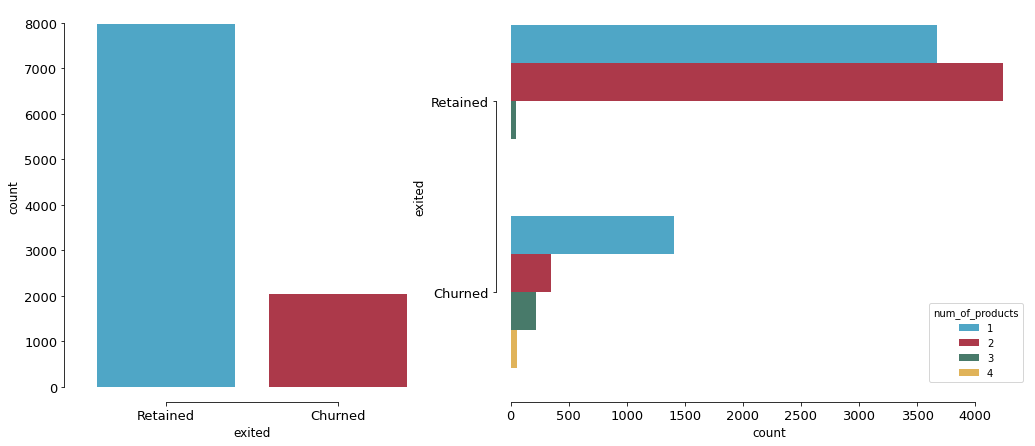

In [ ]:
colors= ['#3bafda','#bf263c']
colors4 = ['#3bafda','#bf263c','#40826d', '#f6bb42']
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(17,7),
                       gridspec_kw=
                        {'width_ratios':(.4,.6,)})
ax[0] = sns.countplot(data=data, x='exited',
                  palette=colors, 
              order=['Retained', 'Churned'], ax=ax[0])
ax[1] = sns.countplot(data=data, y='exited', hue='num_of_products', orient='v', ax=ax[1],
                      order=['Retained', 'Churned'], palette=colors4)
sns.despine(offset=15, trim=True)

In [ ]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products',
       'has_credit_card', 'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

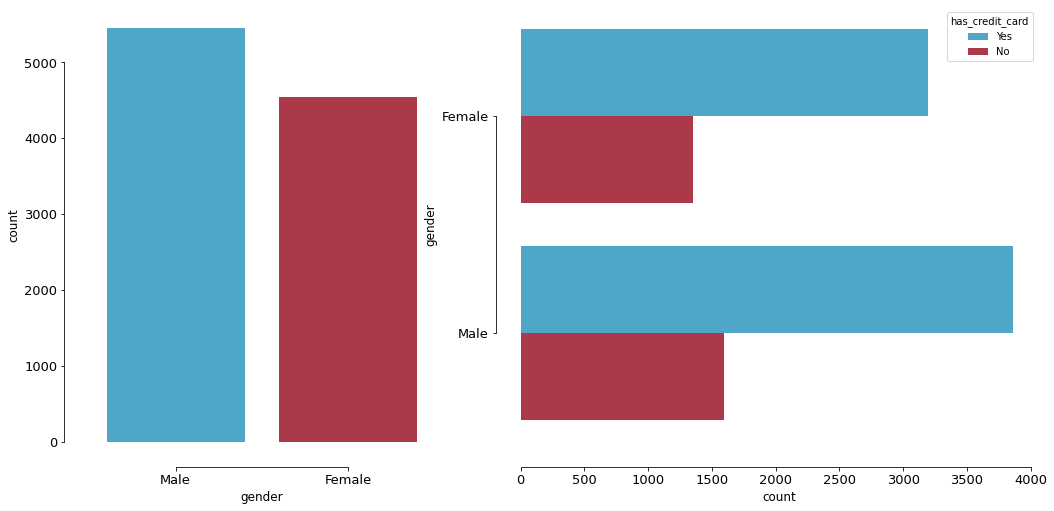

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(17,8),
                       gridspec_kw=
                        {'width_ratios':(.4,.6)})
ax[0]= sns.countplot(data=data, x='gender',
                  palette=colors, 
              order=['Male', 'Female'], ax=ax[0])

ax[1] = sns.countplot(data=data, y='gender', hue='has_credit_card', 
                      palette=colors, ax=ax[1], orient='v')
sns.despine(offset=25, trim=True)

In [ ]:
continous_cols = ['age', 'credit_score',
                 'balance', 'estimated_salary']
cat_cols = ['geography','gender','tenure',
            'num_of_products','has_credit_card',
            'is_active_member']

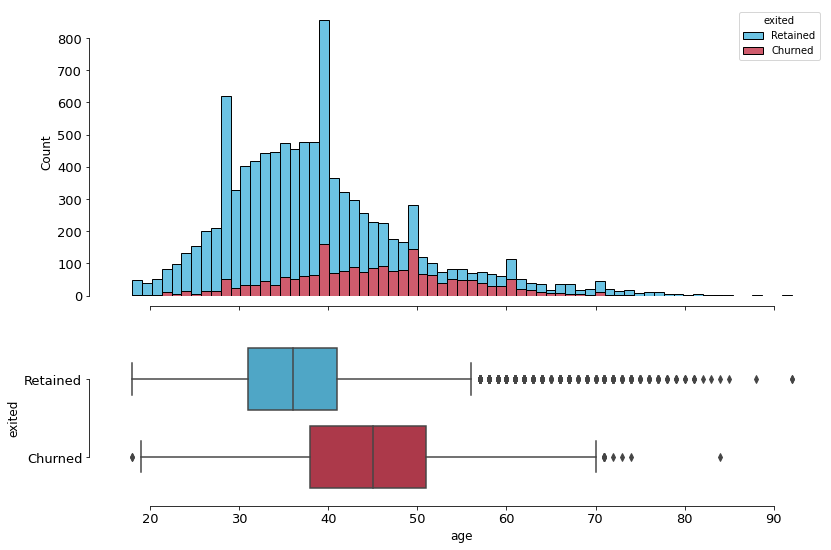

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=1,
                    figsize=(13,9),
                    sharex=True,
                    gridspec_kw=
                        {'height_ratios':(.65,.35)})
sns.histplot(data=data,x='age', hue='exited', 
             palette=colors, ax=ax[0], multiple='stack',
             hue_order=['Retained','Churned'])
sns.boxplot(data=data, x='age', y='exited',
            palette=colors,ax=ax[1], 
            order=['Retained','Churned'])
sns.despine(offset=10, trim=True)

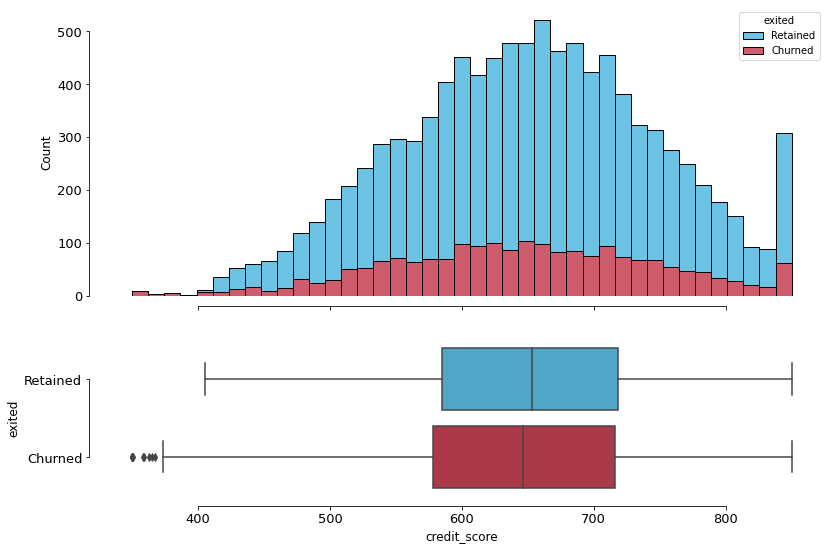

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=1,
                    figsize=(13,9),
                    sharex=True,
                    gridspec_kw=
                        {'height_ratios':(.65,.35)})
sns.histplot(data=data,x='credit_score', hue='exited', 
             palette=colors, ax=ax[0],
             multiple='stack',
             hue_order=['Retained','Churned'])
sns.boxplot(data=data, x='credit_score', y='exited',
            palette=colors,ax=ax[1], 
            order=['Retained','Churned'])
sns.despine(offset=10, trim=True)

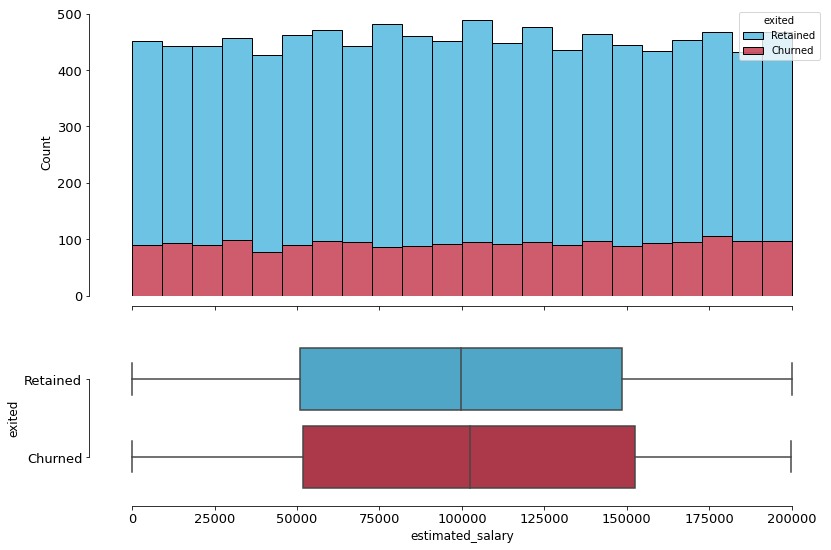

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=1,
                    figsize=(13,9),
                    sharex=True,
                    gridspec_kw=
                        {'height_ratios':(.65,.35)})
sns.histplot(data=data,x='estimated_salary', hue='exited', 
             palette=colors, ax=ax[0],
             multiple='stack',
             hue_order=['Retained','Churned'])
sns.boxplot(data=data, x='estimated_salary', y='exited',
            palette=colors,ax=ax[1], 
            order=['Retained','Churned'])
sns.despine(offset=10, trim=True)

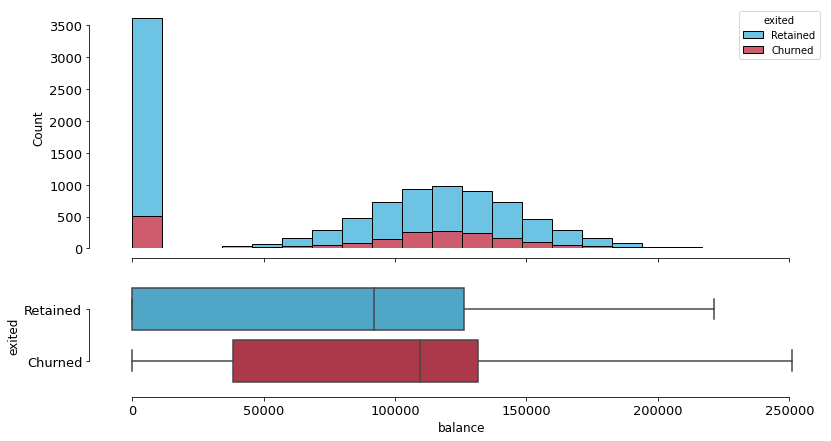

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=1,
                    figsize=(13,7),
                    sharex=True,
                    gridspec_kw=
                        {'height_ratios':(.7,.3)})
sns.histplot(data=data,x='balance', hue='exited', 
             palette=colors, ax=ax[0],
             multiple='stack',
             hue_order=['Retained','Churned'])
sns.boxplot(data=data, x='balance', y='exited',
            palette=colors,ax=ax[1], 
            order=['Retained','Churned'])
sns.despine(offset=10, trim=True)

In [ ]:
data.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

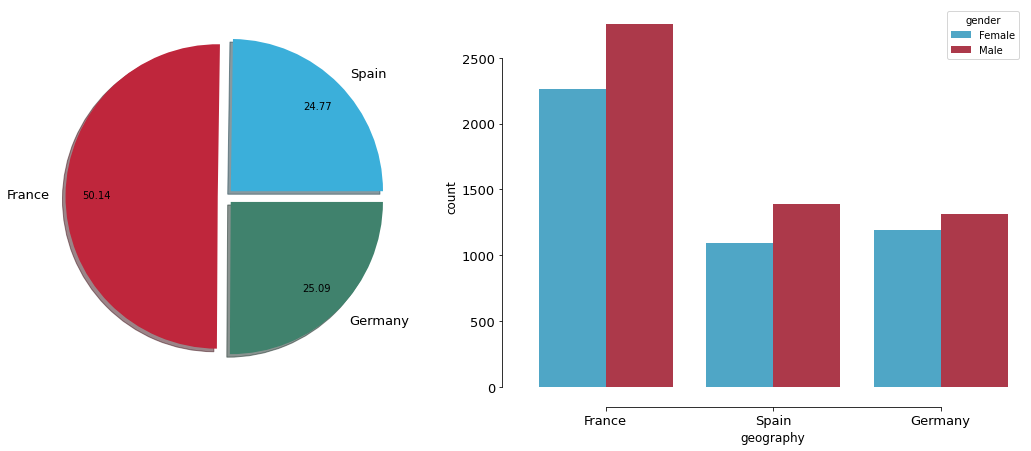

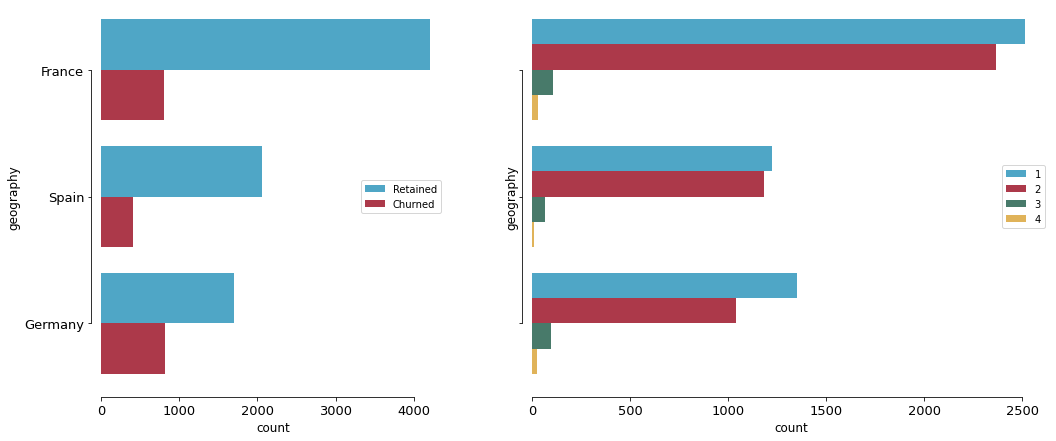

In [ ]:
colors3 = ['#3bafda','#bf263c','#40826d']
france = data['geography'].value_counts()['France']
spain = data['geography'].value_counts()['Spain']
germany = data['geography'].value_counts()['Germany']
names = ['Spain', 'France','Germany']
vals = [spain,france, germany]
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,7),
                       gridspec_kw=
                        {'width_ratios':(.45,.55)})
ax[0].pie(x=vals, labels= names, shadow=True,
        autopct='%1.2f', explode=(0.05,0.05,0.05), 
        colors=colors3, pctdistance=0.8, labeldistance=1.1)
ax[1] = sns.countplot(data=data, x='geography', hue='gender',
                      ax=ax[1], palette=colors)
sns.despine(offset=20, trim=True)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(17,7),sharey=True,
                       gridspec_kw=
                        {'width_ratios':(.4,.6)})
sns.countplot(data=data,y='geography',hue='exited', palette=colors,
              hue_order=['Retained','Churned'], orient='v',ax=ax[0])

sns.countplot(data=data, y='geography', hue='num_of_products', ax=ax[1],
              palette=colors4)
ax[0].legend(loc='center right')
ax[1].legend(loc='center right')
sns.despine(offset=10,trim=True)

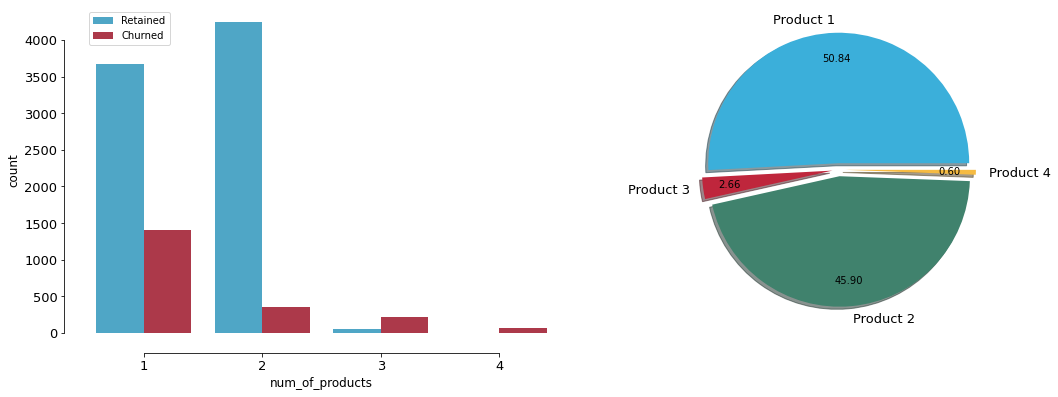

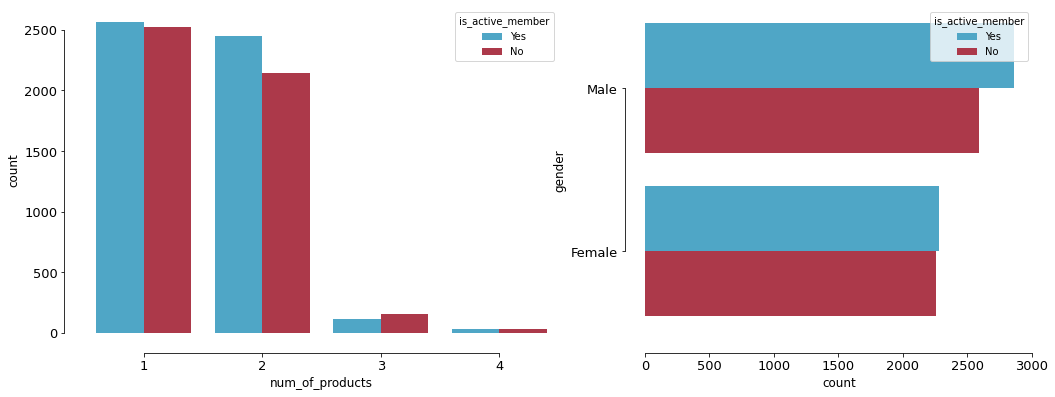

In [ ]:
one = data['num_of_products'].value_counts()[1]
two = data['num_of_products'].value_counts()[2]
three = data['num_of_products'].value_counts()[3]
four = data['num_of_products'].value_counts()[4]
names = ['Product 1','Product 3','Product 2','Product 4']
vals = [one,three,two, four]
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(17,6),
                       gridspec_kw=
                        {'width_ratios':(.55,.45)})
ax[1].pie(x=vals, labels= names, shadow=True,
        autopct='%1.2f', explode=(0.05,0.05,0.05,0.05), 
        colors=colors4, pctdistance=0.8, labeldistance=1.1)
ax[0] = sns.countplot(data=data, x='num_of_products', hue='exited',
                      ax=ax[0], palette=colors4, hue_order=['Retained','Churned'])
ax[0].legend(loc='best')
sns.despine(offset=20, trim=True)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(17,6),
                       gridspec_kw=
                        {'width_ratios':(.55,.45)})
ax[0] = sns.countplot(data=data, x='num_of_products', hue='is_active_member',
                    palette=colors4, hue_order=['Yes','No'], ax=ax[0])
ax[1] = sns.countplot(data=data, y='gender', hue='is_active_member', palette=colors,
              hue_order=['Yes', 'No'], order=['Male', 'Female'],ax=ax[1])
sns.despine(offset=20, trim=True)

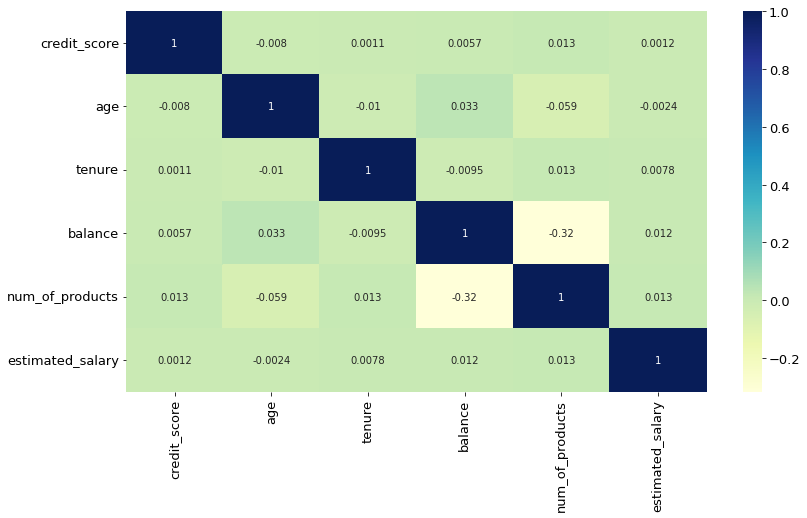

In [ ]:
cor = data.drop(columns=['row_number','customer_id','surname'], 
                 axis=1)
plt.figure(figsize=(13,7))
sns.heatmap(cor.corr(method='spearman'),
            cmap='YlGnBu', annot=True)

In [ ]:
corr = cor.drop('exited',axis=1).apply\
(lambda x: x.corr(cor['exited'], method='spearman'))
corr

credit_score        0.023289
geography          -0.053092
gender              0.106512
age                -0.323968
tenure              0.013978
balance            -0.111110
num_of_products     0.125282
has_credit_card     0.007138
is_active_member    0.156128
estimated_salary   -0.012081
dtype: float64

# A/B Testing - T-Test & P-Value:

In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
means_cr = data.groupby('has_credit_card').mean()['credit_score']
means_cr

has_credit_card
No     651.345331
Yes    650.187952
Name: credit_score, dtype: float64

In [ ]:
std_cr = data.groupby('has_credit_card').std()['credit_score']
std_cr

has_credit_card
No     96.637830
Yes    96.664563
Name: credit_score, dtype: float64

In [ ]:
ns_cr = data.groupby('has_credit_card').count()['credit_score']
ns_cr

has_credit_card
No     2945
Yes    7055
Name: credit_score, dtype: int64

In [ ]:
means_est = data.groupby('has_credit_card').mean()['estimated_salary']
means_est

has_credit_card
No     100974.397711
Yes     99721.161949
Name: estimated_salary, dtype: float64

In [ ]:
std_est = data.groupby('has_credit_card').std()['estimated_salary']
std_est

has_credit_card
No     57761.338594
Yes    57405.532277
Name: estimated_salary, dtype: float64

In [ ]:
ns_est = data.groupby('has_credit_card').count()['estimated_salary']
ns_est

has_credit_card
No     2945
Yes    7055
Name: estimated_salary, dtype: int64

In [ ]:
t1_v_t2 = (means_cr.iloc[0] - means_cr.iloc[1])/\
np.sqrt(std_cr.iloc[0]**2/ ns_cr.iloc[0]\
    +std_cr.iloc[1]**2/ns_cr.iloc[1])
df1_v_df2 = ns_cr.iloc[0] + ns_cr.iloc[1] - 2
p1_v_p2 = (1 - stats.t.cdf(t1_v_t2, df=df1_v_df2))
print(f'T-Test Score: {t1_v_t2:5f},\
\nP-Value: {p1_v_p2:.5f}')

T-Test Score: 0.545864,
P-Value: 0.29259


In [ ]:
t1_v_t2 = (means_est.iloc[0] - means_est.iloc[1])/\
np.sqrt(std_est.iloc[0]**2/ ns_est.iloc[0]\
    +std_est.iloc[1]**2/ns_est.iloc[1])
df1_v_df2 = ns_est.iloc[0] + ns_est.iloc[1] - 2
p1_v_p2 = (1 - stats.t.cdf(t1_v_t2, df=df1_v_df2))
print(f'T-Test Score: {t1_v_t2:3f},\
\nP-Value: {p1_v_p2}')

T-Test Score: 0.990772,
P-Value: 0.1609105532372096


In [ ]:
age = ['age']

# test mean for age of exiting people
retained_mask = data['exited'] == 'Retained'
age_retained = data.loc[retained_mask, age]
age_non_retained = data.loc[~retained_mask, age]
retained_test = ttest_ind(age_retained, age_non_retained)
print(f'Statistic Value: {retained_test[0]},\
\nP-Value: {retained_test[1]}')

Statistic Value: [-29.76681499],
P-Value: [1.23993131e-186]


In [ ]:
tenure = ['tenure']

# test mean from tenures
retained_mask = data['exited'] == 'Retained'
tenure_retained = data.loc[retained_mask, tenure]
tenure_non_retained = data.loc[~retained_mask, tenure]
retained_test = ttest_ind(tenure_retained, tenure_non_retained)
print(f'Statistic Value: {retained_test[0]},\
\nP-Value: {retained_test[1]}')

Statistic Value: [1.40005844],
P-Value: [0.16152685]


In [ ]:
credit = ['credit_score']

# test mean for credit score
retained_mask = data['exited'] == 'Retained'
credit_retained = data.loc[retained_mask, credit]
credit_non_retained = data.loc[~retained_mask, credit]
retained_test = ttest_ind(credit_retained, credit_non_retained)
print(f'Statistic Value: {retained_test[0]},\
\nP-Value: {retained_test[1]}')

Statistic Value: [2.71007789],
P-Value: [0.00673821]


# Machine Learning:

In [ ]:
continous_cols = ['age', 'credit_score',
                 'balance', 'estimated_salary']
cat_cols = ['gender','tenure',
            'num_of_products','has_credit_card',
            'is_active_member']
all_features = continous_cols + cat_cols

In [ ]:
exited_encoded = {'Retained':0,'Churned':1}
data['exited'] = data['exited']\
    .apply(lambda x: exited_encoded[x])
data['exited'].value_counts()


0    7963
1    2037
Name: exited, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
labels.fit(cat_cols)

LabelEncoder()

In [ ]:
df = pd.get_dummies(data, columns=cat_cols, drop_first=True)
df.drop(columns=['row_number','customer_id','surname', 'geography'], axis=1, inplace=True)
df.head()

,credit_score,age,balance,estimated_salary,exited,gender_Male,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,num_of_products_2,num_of_products_3,num_of_products_4,has_credit_card_Yes,is_active_member_Yes
0,619,42,0.00,101348.88,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,608,41,83807.86,112542.58,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,502,42,159660.80,113931.57,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,699,39,0.00,93826.63,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,850,43,125510.82,79084.10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('exited', axis=1).values
y = df['exited'].values

In [ ]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, 
                 random_state=21)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
print(f'Input TrainingShape: {scaled_X_train.shape}\
\nTarget Training Shape: {y_train.shape}\
\nInput Test Shape: {scaled_X_test.shape}\
\nTarget Test Shape: {y_test.shape}')

Input TrainingShape: (8000, 20)
Target Training Shape: (8000,)
Input Test Shape: (2000, 20)
Target Test Shape: (2000,)


## Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score,precision_score, recall_score, roc_auc_score
logreg = LogisticRegression()
logreg.fit(scaled_X_train, y_train)
predictions = logreg.predict(scaled_X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print(f'Accuracy Score: {accuracy}\
\nPrecision Score: {precision}\
\nRecall Score: {recall}\
\nArea Under the Curve: {auc}')

Accuracy Score: 0.833
Precision Score: 0.675531914893617
Recall Score: 0.3175
Area Under the Curve: 0.6396875


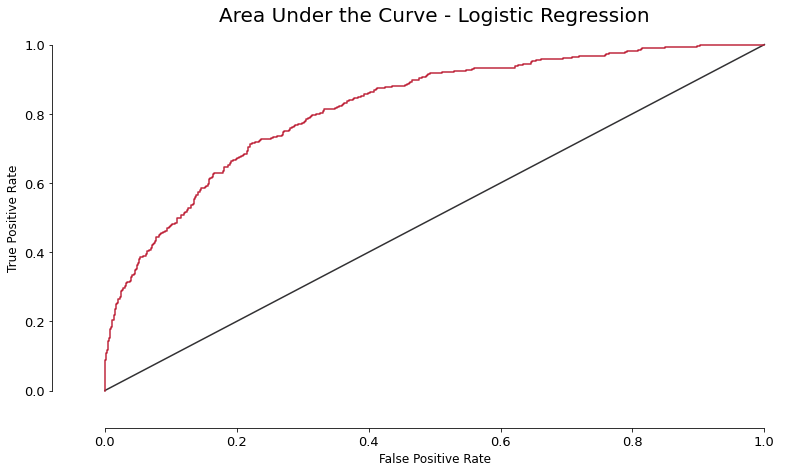

In [ ]:
pred_prob = logreg.predict_proba(scaled_X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred_prob)
plt.figure(figsize=(13,7))
plt.plot([0,1],[0,1],'-', color='#323133')
plt.plot(fpr, tpr, label='Logistic Regression', color='#bf263c')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the Curve - Logistic Regression')
sns.despine(trim=True, offset=20)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':['l1','l2','elastinet'],
              'C':[0.4,0.8,2,6],
              'solver':['liblinear','newton-cg', 'saga']}
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)
logreg_cv.fit(scaled_X_train,y_train)
logreg_cv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

{'C': 0.4, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
logreg_cv.best_score_

0.83675

## Random Forest Model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(
    n_estimators=200, max_depth=5, min_samples_leaf=4)
forest.fit(scaled_X_train, y_train)
predcitions = forest.predict(scaled_X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print(f'Accuracy Score: {accuracy}\
\nPrecision Score: {precision}\
\nRecall Score: {recall}\
\nArea Under the Curve: {auc}')

Accuracy Score: 0.833
Precision Score: 0.675531914893617
Recall Score: 0.3175
Area Under the Curve: 0.6396875


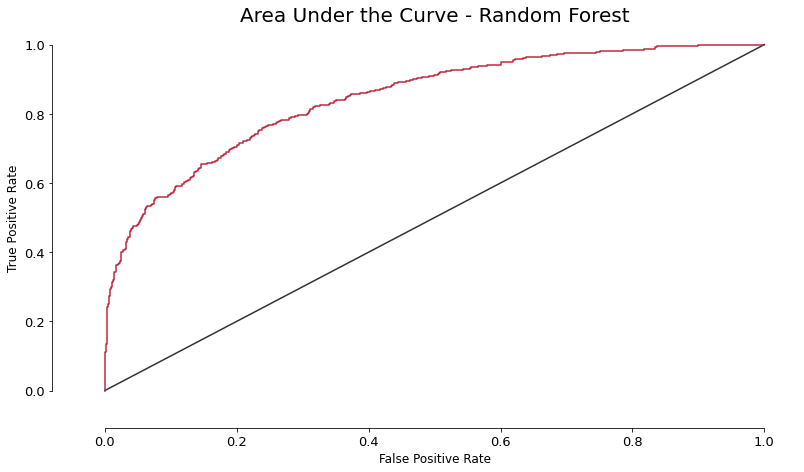

In [ ]:
pred_prob = forest.predict_proba(scaled_X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred_prob)
plt.figure(figsize=(13,7))
plt.plot([0,1],[0,1],'-', color='#323133')
plt.plot(fpr, tpr, label='Random Forest', color='#bf263c')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the Curve - Random Forest')
sns.despine(trim=True, offset=20)
plt.show()

## Model Development:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,\
    recall_score, roc_auc_score

In [ ]:
models = [LogisticRegression(), 
          LinearSVC(), SVC(),
          KNeighborsClassifier(),
          RandomForestClassifier(),
          DecisionTreeClassifier()]
model_names = ['Logistic Regression', 'Linear SVM', 
               'RBFSVM', 'K-Nearest Neighbors',
               'Random Forest', 'Decision Tree']

In [ ]:
accuracy = []
precision = []
recall = []
roc = []
eval = {}
for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(X_train, y_train)
    predicitions = classification_model.predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    roc.append(roc_auc_score(y_test, predictions))

eval = {'Modelling Algorithm': model_names, 
        'Accuracy Score': accuracy,
        'Precision Score':precision,
        'Recall Score': recall,
        'Area Under the Curve': roc}

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
metrics_table = pd.DataFrame(eval)
metrics_table

,Modelling Algorithm,Accuracy Score,Precision Score,Recall Score,Area Under the Curve
0,Logistic Regression,0.833,0.675532,0.3175,0.639687
1,Linear SVM,0.833,0.675532,0.3175,0.639687
2,RBFSVM,0.833,0.675532,0.3175,0.639687
3,K-Nearest Neighbors,0.833,0.675532,0.3175,0.639687
4,Random Forest,0.833,0.675532,0.3175,0.639687
5,Decision Tree,0.833,0.675532,0.3175,0.639687
